In [40]:
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
from IPython.display import display
import torch
import urllib.request

In [4]:
all_models = dir(models)
display(all_models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

## AlexNet

In [5]:
alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 39.3MB/s] 


In [6]:
# evaluation mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
# image preprocessing for alexnet
preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225])
])

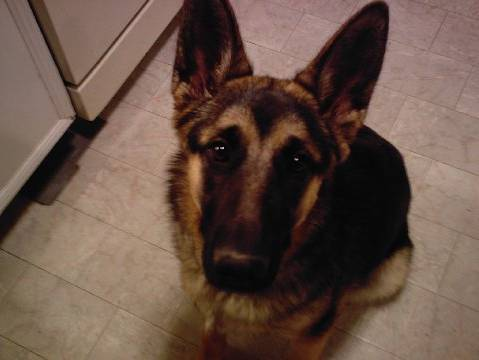

In [41]:
# load image
img = Image.open('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4056.jpg')
display(img)

In [9]:
# image transformation
image_t = preprocess(img)
batch_t = torch.unsqueeze(image_t, 0)
out = alexnet(batch_t)
print('shape of output: ', out.shape) # one example given , 1000 classes
max_value, index = torch.max(out, 1)
print('max value in output', max_value, '\nindex of max value: ', index)

shape of output:  torch.Size([1, 1000])
max value in output tensor([17.0247], grad_fn=<MaxBackward0>) 
index of max value:  tensor([235])


In [10]:
# imagenet classes
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "/kaggle/working/imagenet_classes.txt")
with open('/kaggle/working/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
print('total classes: ', len(labels))

total classes:  1000


In [11]:
# top 1
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('German shepherd', 75.19606018066406)

In [12]:
# top 5
sorted_values, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('German shepherd', 75.19606018066406),
 ('malinois', 22.04214859008789),
 ('Norwegian elkhound', 1.3398360013961792),
 ('dingo', 0.3052355945110321),
 ('kelpie', 0.2042878121137619)]

## CycleGAN

In [59]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
from models import networks

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 2619 (delta 33), reused 20 (delta 20), pack-reused 2549 (from 2)
Receiving objects: 100% (2619/2619), 8.29 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (1621/1621), done.
/kaggle/working/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix


In [60]:
# architecture
netG = networks.define_G(
    input_nc=3,
    output_nc=3,
    ngf=64,
    netG='resnet_9blocks', 
    norm='instance',
    use_dropout=False,
    init_type='normal',
    init_gain=0.02
)

In [61]:
check_point_path = '/kaggle/input/horse2zebra-tensor-parameters/horse2zebra_0.4.0.pth'
state_dict = torch.load(check_point_path, map_location=torch.device('cpu'))
netG.load_state_dict(state_dict)
netG.eval()

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [37]:
# image preprocessing for cyclegan
preprocess_for_netG = T.Compose([
    T.Resize(256),
    T.ToTensor()
])

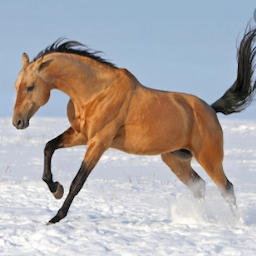

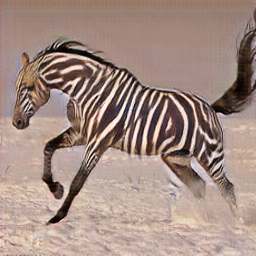

In [52]:
# input
horse_image = Image.open('/kaggle/input/horse-breeds/01_035.png').convert('RGB')
display(horse_image)
img_t = preprocess_for_netG(horse_image)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
# batch_out is now the output of the generator, which we can convert back to an image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_image = T.ToPILImage()(out_t)
display(out_image)

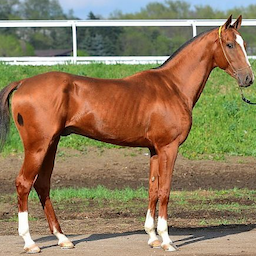

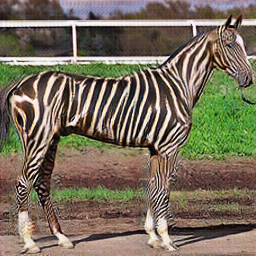

In [53]:
horse_image = Image.open('/kaggle/input/horse-breeds/01_028.png').convert('RGB')
display(horse_image)
img_t = preprocess_for_netG(horse_image)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
# batch_out is now the output of the generator, which we can convert back to an image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_image = T.ToPILImage()(out_t)
display(out_image)

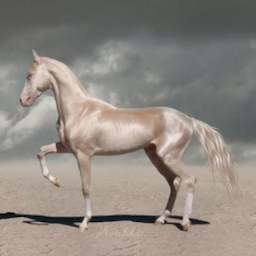

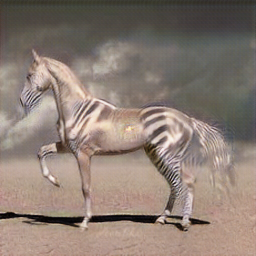

In [51]:
horse_image = Image.open('/kaggle/input/horse-breeds/01_004.png').convert('RGB')
display(horse_image)
img_t = preprocess_for_netG(horse_image)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
# batch_out is now the output of the generator, which we can convert back to an image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_image = T.ToPILImage()(out_t)
display(out_image)